In [26]:
import pandas as pd
# Imports
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import KernelPCA



from sklearn.model_selection import KFold
from scikeras.wrappers import KerasRegressor
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE

# Load the data from CSV files into DataFrames
zone_data_1A = pd.read_csv('zone_data_1A_clustered.csv', nrows=2000)
zone_data_7 = pd.read_csv('zone_data_7_clustered.csv')
zone_data_6 = pd.read_csv('zone_data_6_clustered.csv')

# Separate zone_data_1A into two different DataFrames based on the cluster assignment
zone_data_1A_top = zone_data_1A[zone_data_1A['Cluster'] == 0]
zone_data_1A_bottom = zone_data_1A[zone_data_1A['Cluster'] == 1]

print(zone_data_1A_top)

# Copy the data to avoid SettingWithCopyWarning
zone_data_1A_top_sorted = zone_data_1A_top.copy()
zone_data_1A_bottom_sorted = zone_data_1A_bottom.copy()

# Order the data by 'Create_date_ordinal' from lowest to highest
zone_data_1A_top_sorted.sort_values(by='Create_date_ordinal', ascending=True, inplace=True)
zone_data_1A_bottom_sorted.sort_values(by='Create_date_ordinal', ascending=True, inplace=True)



        Status Application Creation Date Approved / Refused Date  \
0     Recorded                2013-12-07              24/07/2013   
2     Recorded                2018-04-13              26/04/2018   
6      Refused                2009-12-15              16/12/2009   
7     Recorded                2011-02-09              05/09/2011   
9     Recorded                2017-06-21              26/06/2017   
...        ...                       ...                     ...   
1993  Recorded                2011-05-20              30/05/2011   
1994  Recorded                2015-01-19              23/01/2015   
1995  Recorded                2020-12-08              05/09/2020   
1998  Recorded                2013-11-26              29/11/2013   
1999   Expired                2020-03-11              24/11/2020   

     Recorded / Rejected Date Water Share ID Water System Source Reliability  \
0                  23/08/2013      WEE****24            Goulburn        High   
2                  01/0

/opt/homebrew/lib/python3.11/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


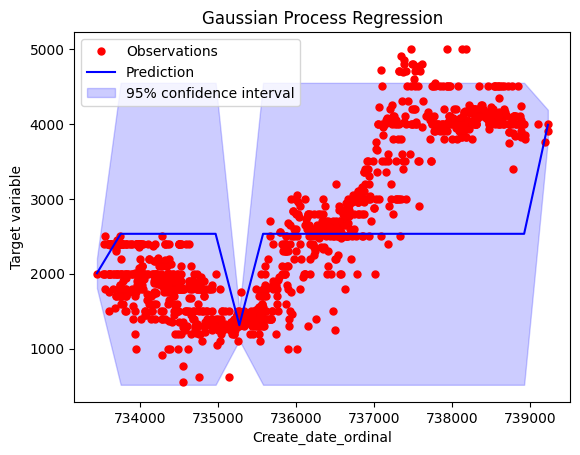

In [33]:
# Import Gaussian Process from scikit-learn
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# Prepare data
X = zone_data_1A_top_sorted['Create_date_ordinal'].values.reshape(-1, 1)
y = zone_data_1A_top_sorted['Price Per ML ($)'].values  # Replace 'SomeTargetVariable' with your actual target variable

# Kernel: combination of a constant kernel and an RBF kernel
kernel = RBF(length_scale=10.0)  # Increase length scale for smoother predictions

# Instantiate a Gaussian Process model
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=100, alpha=1e-2, normalize_y=True)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y)

# Make the prediction on the meshed x-axis (ask for MSE as well)
X_pred = np.linspace(X.min(), X.max(), 20).reshape(-1, 1)
y_pred, sigma = gp.predict(X_pred, return_std=True)

# Plot the function, the prediction and the 95% confidence interval based on the MSE
plt.figure()
plt.plot(X, y, 'r.', markersize=10, label='Observations')
plt.plot(X_pred, y_pred, 'b-', label='Prediction')
plt.fill_between(X_pred[:, 0], y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, alpha=0.2, color='blue', label='95% confidence interval')
plt.xlabel('Create_date_ordinal')
plt.ylabel('Target variable')
plt.title('Gaussian Process Regression')
plt.legend()
plt.show()